In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [23]:
df = pd.read_csv('/Users/annapasko/Desktop/Data Science Prep/SVM/iris.csv')
target = df['variety']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

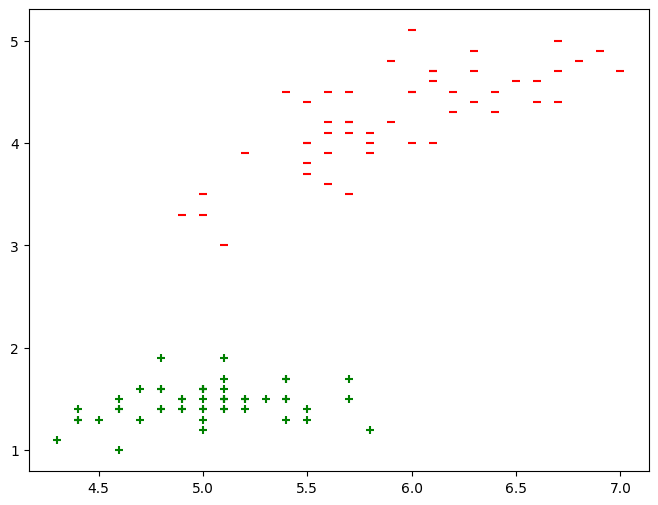

In [33]:
x = df['sepal.length']
y = df['petal.length']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()


In [25]:

## Drop rest of the features and extract the target values
df = df.drop(['sepal.width','petal.width'],axis=1)
Y = []
target = df['variety']
for val in target:
    if(val == 'Setosa'):
        Y.append(-1)
    else:
        Y.append(1)

In [26]:
df = df.drop(['variety'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)


In [27]:
train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2 
    prod = y * y_train
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)

        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)

        count += 1
    epochs += 1

In [28]:
## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2

predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0


**Simple version using imported models**

In [32]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

1.0


/Users/annapasko/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
